Read [link](https://medium.freecodecamp.org/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3)

In [109]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

In [69]:
# Turkish Stopwords
with open('turkce-stop-words.txt') as file:  
    stw = file.read() 
stw = stw.split()
stw = [s.lower() for s in stw] 
stw[:5]

['a', 'acaba', 'altı', 'altmış', 'ama']

In [117]:
from snowballstemmer import stemmer
kokbul1 = stemmer('turkish')
metin = "Uzmanlar Uyarıyor Şeyma Subaşınin Nafakasını Fazla Düşünmek Kronik Uykusuzluğa Neden Olabilir"
metin = re.sub(r'[^\w\s]','',metin)

metin = txt.split()
kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin) if kelime not in stw]
kelimeler

['uzman',
 'uyarıyor',
 'şeyma',
 'subaşın',
 'nafaka',
 'faz',
 'düşünmek',
 'kronik',
 'uykusuzluk',
 'ne',
 'olabilir']

In [119]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for metin in t_list:
    metin = re.sub(r'[^\w\s]','',metin)
    kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin.split()) if kelime not in stw]
    corpus.append(kelimeler)

In [120]:
corpus[1]

['gösteri',
 'fitneci',
 'öl',
 'münafık',
 'öl',
 'abd',
 'öl',
 'ingilter',
 'öl',
 'slogan',
 'atıl']

In [121]:
corpus[2]

['t',
 'lider',
 'ali',
 'hamaney',
 'cumhurbaşka',
 'mahmudu',
 'ahmedinejadı',
 'destekleye',
 'iranlı',
 'son',
 'olay',
 'yeğe',
 'öldürüle',
 'mir',
 'hüsey',
 'musev',
 'baş',
 'üzer',
 'muhalefet',
 'lider',
 'kınadı']

In [122]:
corpus[3]

['musev', 'öl', 'ida', 'ida', 'slogan', 'duyul']

In [123]:
# KElime vektorleri 100 uzunlugunda
# merkezdeki kelimenin sag ve solunda +5,-5 kelimeye bakiyor
# min_count=5 nadir kelimeleri ele
# sg=1 skip-gram

model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

In [124]:
model.wv.most_similar('youtube')

[('interne', 0.7474668025970459),
 ('twitter', 0.7082403898239136),
 ('yayınlamas', 0.7008506059646606),
 ('link', 0.6920303106307983),
 ('twıtter', 0.6869251728057861),
 ('liveleak', 0.6787548065185547),
 ('videos', 0.6645441055297852),
 ('ileti', 0.6626025438308716),
 ('sansürsüz', 0.662102222442627),
 ('weibo', 0.6554743051528931)]

# Modeli kaydetmek

In [126]:
model.save('word2vec.model')

In [127]:
model = Word2Vec.load('word2vec.model')

In [128]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

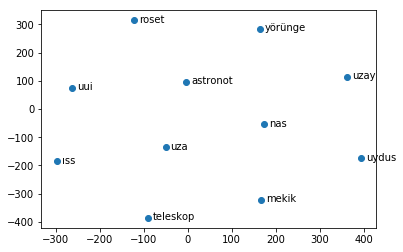

In [129]:
closestwords_tsneplot(model, 'uzay')

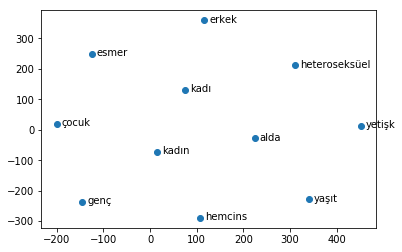

In [130]:
closestwords_tsneplot(model, 'erkek')

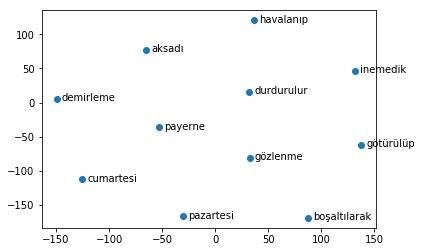

In [131]:
closestwords_tsneplot(model, 'pazartesi')

In [132]:
model.wv.most_similar(positive=['akşam', 'bugün'], negative=['sabah'], topn=1)

[('stresli', 0.6585512161254883)]

In [133]:
model.wv.most_similar(positive=['anne', 'baba'], negative=['kadın'], topn=5)

[('oğl', 0.7321794033050537),
 ('bap', 0.7023342847824097),
 ('babas', 0.7017528414726257),
 ('oğlu', 0.6833693981170654),
 ('annes', 0.6789007186889648)]

In [135]:
model.wv.most_similar(positive=['iyi', 'suçlu'], negative=['kötü'], topn=1)

[('mucize', 0.5597928166389465)]

# Metin isleme

In [136]:
txt1 = "futbol basketbol hareket koşu yüzmek"
txt2 = "spor koş bisikler"

txt3 = "siyaset politika seçim propaganda"
txt4 = "siyasi politik sandık"

In [137]:
def getVec(txt):
    metin = txt.split()
    kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin) if kelime not in stw]
    
    vec = np.zeros(100)
    for kelime in kelimeler:
        try:
            vec = vec + model.wv[kelime]
        except:
            print("{} not in vocabulary".format(kelime))
    return vec

In [138]:
vec1 = getVec(txt1)
vec2 = getVec(txt2)
vec3 = getVec(txt3)
vec4 = getVec(txt4)

bisik not in vocabulary


In [139]:
dataDict = {'vec1':vec1,'vec2':vec2,'vec3':vec3,'vec4':vec4}
df = pd.DataFrame.from_dict(dataDict)

In [140]:
df.corr()

,vec1,vec2,vec3,vec4
vec1,1.000000,0.739416,0.423863,0.340295
vec2,0.739416,1.000000,0.346029,0.317990
vec3,0.423863,0.346029,1.000000,0.807687
vec4,0.340295,0.317990,0.807687,1.000000


In [141]:
txt1 = """Kazanmak için gelmiştik ama ne yazık ki bu olmadı. 
Futbolda böyle şeyler olabiliyor. 1. dakikadan 90. dakikaya kadar herkes elinden 
gelen mücadeleyi verdi ama şu an önümüzde Avrupa Ligi opsiyonumuz var. 
Orada da elimizden geleni yapacağız. 
Taraftarımızla birlikte nasıl oynadığımızı herkes biliyor. 
Porto'yu evimizde yenmek istiyoruz."""

txt2 = """
Fenerbahçe’yle yarın oynayacakları maçı değerlendiren Hajrovic, 
"Genel olarak bu şehri çok seviyorum. Bu şehirde bana saygı duyuyorlar. 
Fenerbahçe’nin Türkiye’de ligde zor durumda olduğunu biliyoruz. 
Belli kaliteleri var ve zorlanacağız fakat kazanmak istiyoruz. 
Fenerbahçe seyircisi önünde oynayacak. Olumsuz bir durumda olsalar da belli bir kaliteleri var. 
İyi maç çıkarmaya çalışacaklar ve bizim de tedbirli olmamız gerekiyor. 
Biz bu grupta gereken başarıyı gösterdik ve buna devam edeceğiz." şeklinde konuştu.
"""

txt3 = """
Yeni arayüzün beta sürümünü test eden kullanıcılar, kamera uygulamasında önemli 
bir değişiklik gördüler. Samsung yeni kullanıcı arayüzünde kamera uygulamasında video 
çekim özelliğini iPhone ile benzer şekilde ayrı bir mod haline getiriyor.
"""

txt4 = """
Özellikle telefonları biraz eskimeye başlayan Android kullanıcılarının en çok beklediği gelişme günceleme. 
Samsung, oldukça yüksek adetlerde sattığı Galaxy A5 2017, Galaxy A8 2018 ve Galaxy S7’ye yeni güncellemelerini 
yayınladı. 
Android güvenlik güncelleştirmesi olan bu güncellemeler, telefonu güncel tehditlerden koruyor.
"""

In [142]:
vec1 = getVec(txt1)
vec2 = getVec(txt2)
vec3 = getVec(txt3)
vec4 = getVec(txt4)

olmadı. not in vocabulary
olabiliyor. not in vocabulary
1. not in vocabulary
90. not in vocabulary
var. not in vocabulary
yapacağız. not in vocabulary
biliyor. not in vocabulary
porto'yu not in vocabulary
istiyoruz. not in vocabulary
fenerbahçe’yle not in vocabulary
hajrovic, not in vocabulary
"genel not in vocabulary
seviyorum. not in vocabulary
bu not in vocabulary
duyuyorlar. not in vocabulary
fenerbahçe’n not in vocabulary
türkiye’ not in vocabulary
biliyoruz. not in vocabulary
istiyoruz. not in vocabulary
oynayacak. not in vocabulary
var. not in vocabulary
i̇yi not in vocabulary
gerekiyor. not in vocabulary
biz not in vocabulary
edeceğiz." not in vocabulary
konuştu. not in vocabulary
ye not in vocabulary
arayüz not in vocabulary
sürüm not in vocabulary
kullanıcılar, not in vocabulary
gördüler. not in vocabulary
samsungu not in vocabulary
arayüz not in vocabulary
mod not in vocabulary
getiriyor. not in vocabulary
eskime not in vocabulary
günceleme. not in vocabulary
samsung, not in

In [143]:
dataDict = {'vec1':vec1,'vec2':vec2,'vec3':vec3,'vec4':vec4}
df = pd.DataFrame.from_dict(dataDict)

In [144]:
df.corr()

,vec1,vec2,vec3,vec4
vec1,1.000000,0.908422,0.755859,0.833113
vec2,0.908422,1.000000,0.788803,0.843758
vec3,0.755859,0.788803,1.000000,0.892051
vec4,0.833113,0.843758,0.892051,1.000000


In [149]:
metin = "Uzmanlar Uyarıyor Şeyma .. 0 8 Subaşı'nin Nafakasını Fazla Düşünmek Kronik Uykusuzluğa Neden Olabilir"
metin = re.sub(r'[^\w\s]','',metin)

In [150]:
metin

'Uzmanlar Uyarıyor Şeyma  0 8 Subaşınin Nafakasını Fazla Düşünmek Kronik Uykusuzluğa Neden Olabilir'